In [1]:
from modules import utils

config = utils.load_config()
config

{'openai': {'api_key_env': 'OPENAI_API_KEY', 'gpt_model': 'gpt-4.1-mini'},
 'sd_pipeline': {'inpaint': {'model_id': 'runwayml/stable-diffusion-inpainting'},
  'text2img': {'model_id': 'runwayml/stable-diffusion-v1-5'},
  'torch_dtype': 'float16',
  'use_safety_checker': False,
  'device': 'cuda'},
 'lora': {'category_map': {'food': [{'name': 'foodplatters', 'scale': 1.0},
    {'name': 'meishi', 'scale': 0.4}],
   'cosmetics': [{'name': 'e-commerce_photography02', 'scale': 1.0},
    {'name': 'showcase', 'scale': 0.7}],
   'furniture': [{'name': 'product_design_v3', 'scale': 1.0},
    {'name': 'showcase', 'scale': 0.6}]}},
 'ip_adapter': {'image_encoder': 'laion/CLIP-ViT-H-14-laion2B-s32B-b79K',
  'checkpoint': 'ip-adapter_sd15.bin'},
 'generation': {'inference_steps': 35,
  'guidance_scale': 7,
  'negative_prompt': 'logo, text, watermark, blurry, extra fingers, human'},
 'paths': {'product_image': './images/perfume.jfif',
  'reference_image': './images/ref_image.png',
  'output_dir': '.

In [2]:
import logging

logger = utils.setup_logger(__name__, logging.DEBUG)
config['paths']['product_image'] = './images/food1.jfif'
config['product_type'] = "food"

[2025-07-07 07:42:02] [DEBUG] [modules.utils] - [START] Remove Background...
[2025-07-07 07:42:02] [INFO] [modules.utils] - Removing background from image path: ./images/food1.jfif
[2025-07-07 07:42:05] [INFO] [modules.utils] - [TIME] Remove Background... 실행 시간: 3.066초


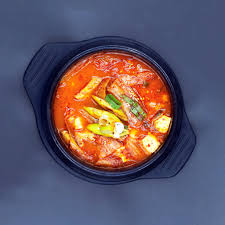

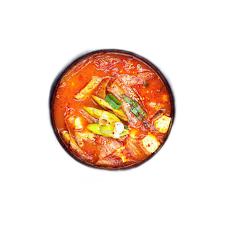

In [3]:
bg_rm_img = utils.remove_background(config['paths']['product_image'])
display(bg_rm_img[0], bg_rm_img[1])

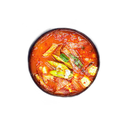

In [4]:
resized_img = utils.resize_to_ratio(bg_rm_img[1], (128, 128))
resized_img

[2025-07-07 07:42:05] [DEBUG] [modules.utils] - [START] Create Masking image...
[2025-07-07 07:42:05] [INFO] [modules.utils] - Creating mask from alpha channel
[2025-07-07 07:42:05] [INFO] [modules.utils] - [TIME] Create Masking image... 실행 시간: 0.001초


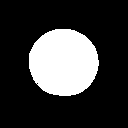

In [5]:
mask = utils.create_mask(resized_img)
mask

In [6]:
bg_rm_img[1].size

(225, 225)

[2025-07-07 07:42:05] [DEBUG] [modules.utils] - [START] Overlaying product image...
[2025-07-07 07:42:05] [INFO] [modules.utils] - [TIME] Overlaying product image... 실행 시간: 0.001초


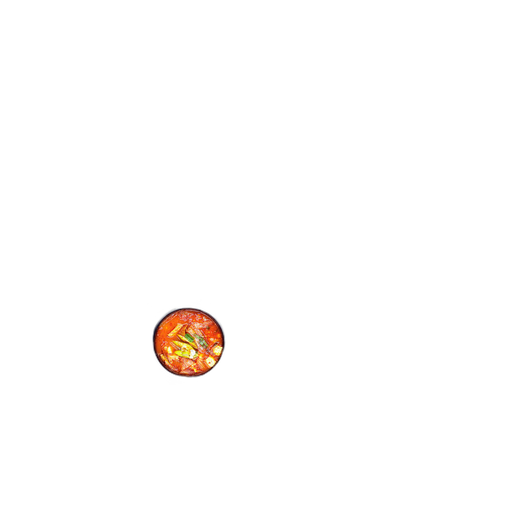

In [7]:
from PIL import Image

canvas = Image.new("RGBA", (512, 512), (255, 255, 255, 255))
canvas = utils.overlay_product(canvas, resized_img, (125, 280))
canvas

In [8]:
from PIL import Image
img_base64 = utils.encode_image(resized_img)
img_base64

[2025-07-07 07:42:05] [DEBUG] [modules.utils] - [START] Encode image to base64...
[2025-07-07 07:42:05] [INFO] [modules.utils] - Encoding image to size None
[2025-07-07 07:42:05] [INFO] [modules.utils] - [TIME] Encode image to base64... 실행 시간: 0.002초


'iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAIAAABMXPacAAAsqUlEQVR4nO3deZAk130n9vde3mfdZ1ffPX3PjcFgTlwEQBCgQIqXSZMUbdNQOGzJtmxvaG2LNGV7bWljd7XhleyQuLukpCCpBVYCSOIgruFgZjAzmANz9Tl9H9V1V2VV3pnvPf/BiJWl5Tr2j+kZKLY+0X90dFd0VX2/lZWVWfV+DUBXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV9cDAwGAf/0NhBACCCD869/SB3fb/gOQyQCg/ls/1X7pZf9NVR9zH9cbKQPAAomNh0SSEc8AQHGIPDevx3kGA0QJoZwoYN/jQCirquW4juMgFoRUNIFUx7hT3QDA+cUf+zhvGR+jAiKRiGF4qsoKSoJCFDgBQ6iCRAb6KufnNaVH4qTAbTZakh5LZgtOQBECLPAoZFzXtyw3RAESdSvgWrYVAL8ZYBNTi+J6eR0AACH8FqXfedB382/5mBSQAcCQJD6SSHk+Qo4vIzclKVESpjRhbCTLW7WkKLGhU63thDSa7xmKx3TA8h3PIxKKqjovKbVGy/RMQHjb8iqV7abZ2fFgvWNhTqAct9WxdupbAAAIIaUfo+3hY1GALEeSyWzIRF2jlYVeVJTSGlOg9mg2qomsbzcFXuyJp9uGIakyiyuAdHgx5jVKvtl0fCkUBA9DQEJOjmJWIrF+VssT6BtOo1p3ipV2o2OAeMZi+aXNhZViEXycnpQeaAGZDCiXs4VRXoj7lit5payCcpK8R5azSW1gWJKra3cXSmKir9AzGZXaHg0oZtRw0x3K69wec3ULW3fEdrBjdwACER+2WzhApOEAABggQp+VK54YG5hSspmZhTs1MwiEVNluz2zeqFj+g7zj/x8PsgCOk3N9o4xNQeDH2NZAIpISlImkmMmmM+WNSC/urPt+yxZSlMT3qJJbp1RM98hrl6XEuMATyGn+2HG

In [9]:
from modules import gpt_module
import os

client = gpt_module.GPTClient(
    api_key=os.getenv(config['openai']['api_key_env']), 
    model_name=config['openai']['gpt_model']
    )

[2025-07-07 07:42:06] [INFO] [modules.gpt_module] - Initializing GPTClient with model: gpt-4.1-mini


In [10]:
ad_plan = client.chat(
    messages=[
        {
            "role": "system", 
            "content": "You are an advertisement planner, How would you plan given the advertisement with the input as a product"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text", 
                    "text":"Product type: Food. Context: 인풋 이미지를 마스킹한 상태에서 배경 생성하기"
                }, 
                {
                    "type": "image_url", 
                    "image_url": {
                        "url": f"data:image/png;base64,{img_base64}"
                    }
                }
            ]
        }
    ],
    max_tokens=300
)

[2025-07-07 07:42:06] [DEBUG] [modules.gpt_module] - Sending message to OpenAI...
[2025-07-07 07:42:13] [DEBUG] [modules.gpt_module] - Received response from OpenAI


In [11]:
print(ad_plan)

Given the product is a food item—a spicy-looking Korean stew or soup—here is an advertisement planning approach centered around generating a background while the food image is masked:

### Advertisement Planning for Food Product with Masked Input Image

**Product:** Korean spicy stew (e.g., Kimchi Jjigae or similar spicy soup)

---

### 1. **Objective:**
- Highlight the rich, flavorful, and comforting nature of the dish.
- Create a visually appealing and warm atmosphere that evokes a sense of home-cooked goodness.
- Focus on enhancing the product’s appeal without distractions, using the masked image to seamlessly integrate the food into contextual backgrounds.

---

### 2. **Target Audience:**
- Food enthusiasts who enjoy Korean cuisine.
- Customers looking for convenient, hearty meals.
- Age group: 18-45, urban dwellers, food bloggers, social media users.

---

### 3. **Concept for Background Generation:**

**A. Background Themes:**

1. **Traditional Korean Setting:**
   - Background 

In [12]:
ad_plan2 = client.analyze_ad_plan(img_base64, product_type=config['product_type'], marketing_type="인풋 이미지를 마스킹한 상태에서 배경 생성하기")

[2025-07-07 07:42:13] [DEBUG] [modules.utils] - [START] Generating Ad Plan...
[2025-07-07 07:42:13] [INFO] [modules.gpt_module] - Generating ad plan using GPT
[2025-07-07 07:42:13] [DEBUG] [modules.gpt_module] - Sending message to OpenAI...
[2025-07-07 07:42:18] [DEBUG] [modules.gpt_module] - Received response from OpenAI
[2025-07-07 07:42:18] [INFO] [modules.utils] - [TIME] Generating Ad Plan... 실행 시간: 4.489초


In [13]:
print(ad_plan2)

- 제품 요약: 얼큰하고 진한 국물에 각종 채소와 두부가 어우러진 매콤한 찌개 요리. 빨간색과 주황빛 국물이 시선을 사로잡으며, 고명으로 올려진 파와 청양고추가 신선함과 매운맛을 암시함.
- 배경 디자인 제안: 따뜻한 나무 식탁 위에 자연광이 부드럽게 드리우는 주방 혹은 식당 내부. 찌개의 매운맛과 온기를 강조할 수 있도록 붉은 계열의 조명과 촛불, 전통적인 한식 식기류가 어우러진 배경.
- 광고 분위기 키워드: 따뜻함, 정성, 전통, 매운맛, 포근함
- 짧은 카피 제안: “한 숟갈의 깊은 맛, 집밥의 온기”


In [14]:
prompt = client.convert_to_sd_prompt(ad_plan2)

[2025-07-07 07:42:18] [DEBUG] [modules.utils] - [START] Converting to Prompt...
[2025-07-07 07:42:18] [INFO] [modules.gpt_module] - Converting ad plan to Stable Diffusion prompt
[2025-07-07 07:42:18] [DEBUG] [modules.gpt_module] - Sending message to OpenAI...
[2025-07-07 07:42:20] [DEBUG] [modules.gpt_module] - Received response from OpenAI
[2025-07-07 07:42:20] [INFO] [modules.utils] - [TIME] Converting to Prompt... 실행 시간: 1.982초


In [15]:
print(prompt)

Warm and inviting kitchen interior featuring a wooden table bathed in soft natural light, accented by red-toned candlelight and traditional Korean dishware, viewed from a close-angle with shallow depth of field to emphasize texture and coziness.


In [16]:
from modules import pipeline_utils
base_pipe = pipeline_utils.load_base_pipe(config, 'inpaint')

/home/spai0107/model_dev/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[2025-07-07 07:42:27] [DEBUG] [modules.utils] - [START] Load Stable Diffution Pipeline...
[2025-07-07 07:42:27] [INFO] [modules.pipeline_utils] - Loading base pipeline: inpaint
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
[2025-07-07 07:42:45] [INFO] [modules.pipeline_utils] - Pipeline loaded successfully.
[2025-07-07 07:42:45] [INFO] [modules.utils] - [TIME] Load Stable Diffution Pipeline... 실행 시간: 18.242초


In [17]:
pipe = pipeline_utils.apply_loras(base_pipe, config, category="food")

[2025-07-07 07:42:45] [DEBUG] [modules.utils] - [START] Applying LoRA Layers...
[2025-07-07 07:42:45] [INFO] [modules.pipeline_utils] - Applying LoRAs for category 'food': ['foodplatters', 'meishi']
/home/spai0107/model_dev/.venv/lib/python3.10/site-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(
[2025-07-07 07:42:47] [DEBUG] [modules.pipeline_utils] - <bound method PeftAdapterMixin.active_adapters of UNet2DConditionModel(
  (conv_in): Conv2d(9, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(


In [19]:
from modules import ad_generator
config['canvas_size'] = (512, 512)
image = ad_generator.run_inpainting(pipe, resized_img, mask, prompt, config)

[2025-07-07 07:43:23] [DEBUG] [modules.utils] - [START] Inpainting process...
[2025-07-07 07:43:23] [INFO] [modules.ad_generator] - Running inpainting with inverted mask
100%|██████████| 35/35 [00:05<00:00,  5.84it/s]
[2025-07-07 07:43:31] [INFO] [modules.utils] - [TIME] Inpainting process... 실행 시간: 7.934초


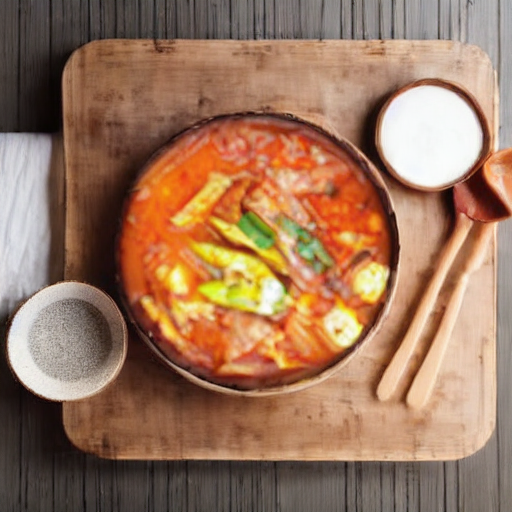

In [20]:
image[0]

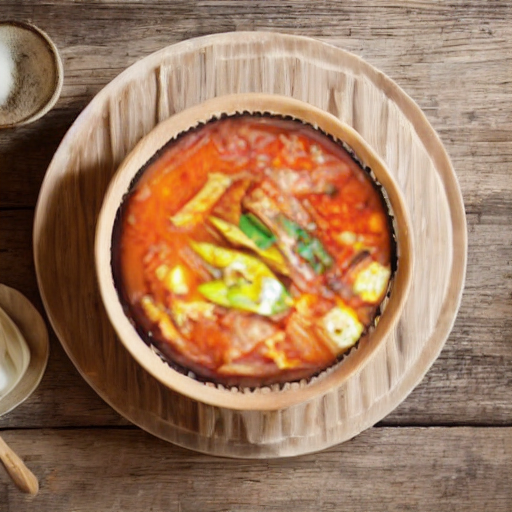

In [21]:
image[1]

In [22]:
base_pipe = pipeline_utils.load_base_pipe(config, 'text2img')

[2025-07-07 07:43:36] [DEBUG] [modules.utils] - [START] Load Stable Diffution Pipeline...
[2025-07-07 07:43:36] [INFO] [modules.pipeline_utils] - Loading base pipeline: text2img
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.84it/s]
[2025-07-07 07:43:53] [INFO] [modules.pipeline_utils] - Pipeline loaded successfully.
[2025-07-07 07:43:53] [INFO] [modules.utils] - [TIME] Load Stable Diffution Pipeline... 실행 시간: 17.776초


In [23]:
pipe_t2i = pipeline_utils.apply_loras(base_pipe, config, category='food')

[2025-07-07 07:43:53] [DEBUG] [modules.utils] - [START] Applying LoRA Layers...
[2025-07-07 07:43:53] [INFO] [modules.pipeline_utils] - Applying LoRAs for category 'food': ['foodplatters', 'meishi']
[2025-07-07 07:43:55] [DEBUG] [modules.pipeline_utils] - <bound method PeftAdapterMixin.active_adapters of UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): lora.Conv2d(
            (base_layer): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
            (lora_dropout): ModuleDict(
              (foodp

In [24]:
gen_backs = ad_generator.generate_background(pipe_t2i, prompt, config)

[2025-07-07 07:43:55] [DEBUG] [modules.utils] - [START] Background image generating...
[2025-07-07 07:43:55] [INFO] [modules.ad_generator] - Generating background image with prompt
100%|██████████| 35/35 [00:05<00:00,  5.86it/s]
[2025-07-07 07:44:02] [DEBUG] [modules.ad_generator] - Saved debug background: debug_output.png
[2025-07-07 07:44:02] [INFO] [modules.utils] - [TIME] Background image generating... 실행 시간: 6.643초


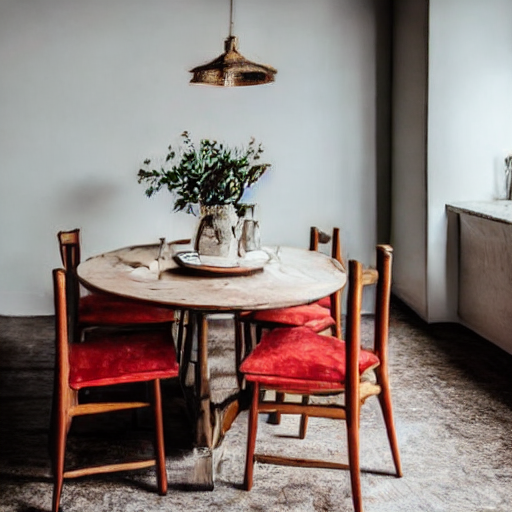

In [25]:
gen_backs

In [26]:
ip_adapter = pipeline_utils.load_ip_adapter(pipe_t2i, config)

[2025-07-07 07:44:02] [DEBUG] [modules.utils] - [START] Load IP-Adapter...
[2025-07-07 07:44:19] [INFO] [modules.pipeline_utils] - IP-Adapter loaded: ip-adapter_sd15.bin
[2025-07-07 07:44:19] [INFO] [modules.utils] - [TIME] Load IP-Adapter... 실행 시간: 17.301초


In [27]:
from modules.ad_generator import ip_adapter_inference
ip_gen = ip_adapter_inference(ip_adapter, config, prompt, gen_backs, resized_img)

[2025-07-07 07:44:19] [DEBUG] [modules.utils] - [START] Inference from IP-Adapter...
[2025-07-07 07:44:19] [INFO] [modules.ad_generator] - Running IP-Adapter fusion
100%|██████████| 35/35 [00:12<00:00,  2.77it/s]
[2025-07-07 07:44:33] [INFO] [modules.utils] - [TIME] Inference from IP-Adapter... 실행 시간: 13.785초


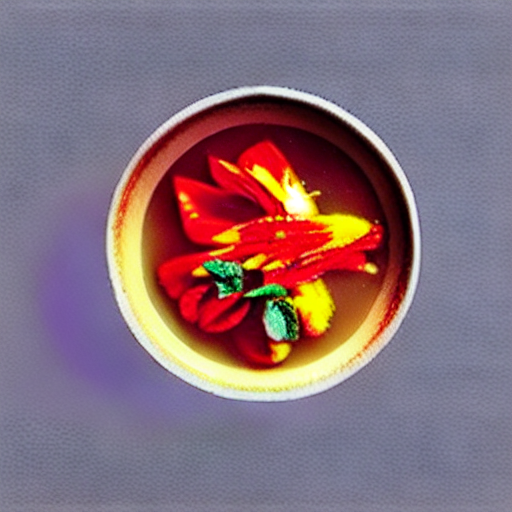

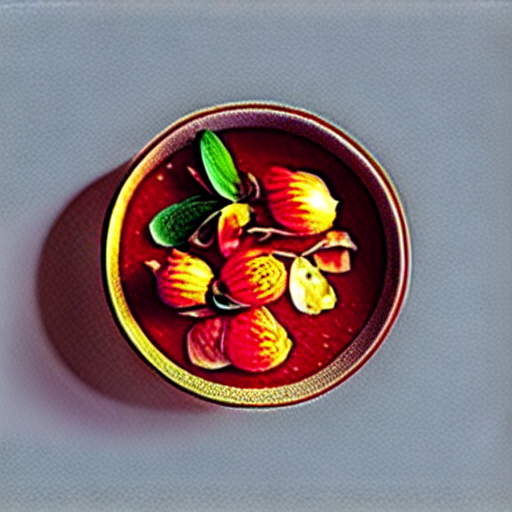

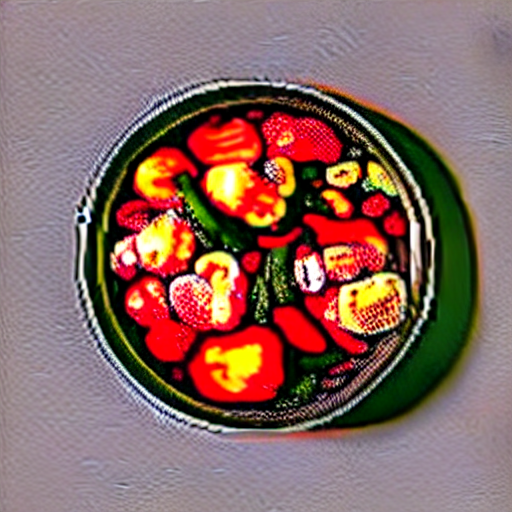

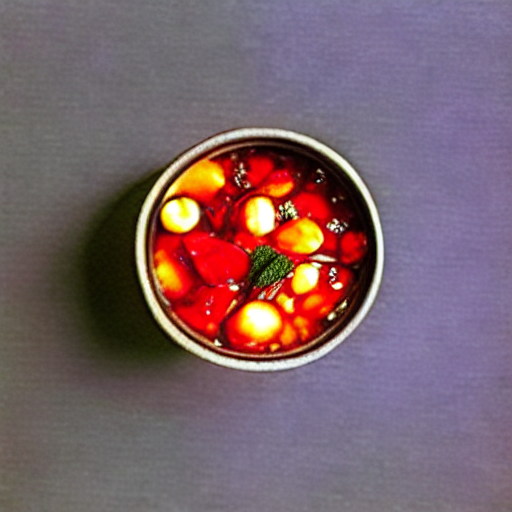

In [28]:
for img in ip_gen:
    display(img)